In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Import our input dataset
charityData_df = pd.read_csv('charity_data.csv')
charityData_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Print df Stats
print(f"The total number of rows in the df are {len(charityData_df)}")


The total number of rows in the df are 34299


In [4]:
# What datatypes exist within each column 
charityData_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Find null values 
for column in charityData_df.columns: 
    print(f"Column {column} has {charityData_df[column].isnull().sum()} null values")

Column EIN has 0 null values
Column NAME has 0 null values
Column APPLICATION_TYPE has 0 null values
Column AFFILIATION has 0 null values
Column CLASSIFICATION has 0 null values
Column USE_CASE has 0 null values
Column ORGANIZATION has 0 null values
Column STATUS has 0 null values
Column INCOME_AMT has 0 null values
Column SPECIAL_CONSIDERATIONS has 0 null values
Column ASK_AMT has 0 null values
Column IS_SUCCESSFUL has 0 null values


In [6]:
# Determine out if there are duplicated rows in the EIN column 
df = charityData_df.drop_duplicates(subset=["EIN"])
print(f"There were {len(charityData_df) - len(df)} duplicated rows in the EIN column")

There were 0 duplicated rows in the EIN column


In [7]:
# Determine out if there are duplicates rows in the NAME column 
df = charityData_df.drop_duplicates(subset=["NAME"])
print(f"There were {len(charityData_df) - len(df)} duplicated rows in the NAME column")


There were 14731 duplicated rows in the NAME column


In [8]:
# The above results imply that we're able to remove the EIN column, but not the NAME column, as there may be a relationship 
# between companies and their ability to utilize the loans successfully. 
charityData_df.drop(columns = ["EIN"], inplace = True)
charityData_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
# Generate our categorical variable list
charity_cat = charityData_df.dtypes[charityData_df.dtypes == "object"].index.tolist()
# Check the number of unique values in each column
charityData_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [10]:
# Investigate distribution of NAME and CLASSIFICATION columns 

In [11]:
# NAME COlumn 
name_counts = charityData_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                   1260
TOPS CLUB INC                                             765
UNITED STATES BOWLING CONGRESS INC                        700
WASHINGTON STATE UNIVERSITY                               492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC           408
                                                         ... 
JESSICA LEE FOUNDATION INC                                  1
AEMP EDUCATION FOUNDATION                                   1
FAMILY TREE MINISTRIES INC                                  1
LAKE SPOKANE PTN                                            1
UPPER CUMBERLAND MEDICAL GROUP MANAGEMENT ASSOCIATION       1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

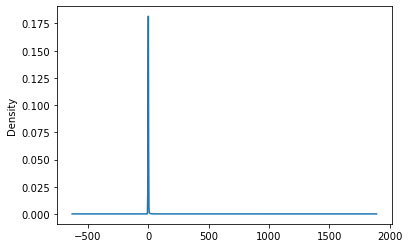

In [12]:
# Visualize the value counts
name_counts.plot.density()

In [13]:
# Determine which values to replace
replace_name = list(name_counts[name_counts < 50].index)

# Replace in DataFrame
for name in replace_name:
    charityData_df["NAME"] = charityData_df["NAME"].replace(name,"Other_name")


# Check to make sure binning was successful
charityData_df["NAME"].value_counts()

Other_name                                                            24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [14]:
# CLASSIFICATION COlumn 
class_count = charityData_df["CLASSIFICATION"].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C4120        1
C1245        1
C8210        1
C1248        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

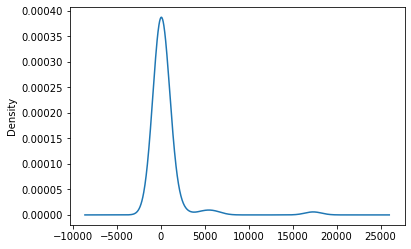

In [15]:
# Visualize the value counts
class_count.plot.density()

In [16]:
# Determine which values to replace
replace_class = list(class_count[class_count < 50].index)

# Replace in DataFrame
for item in replace_class:
    charityData_df.CLASSIFICATION = charityData_df.CLASSIFICATION.replace(item,"Other_class")


# Check to make sure binning was successful
charityData_df.CLASSIFICATION.value_counts()

C1000          17326
C2000           6074
C1200           4837
C3000           1918
C2100           1883
C7000            777
Other_class      391
C1700            287
C4000            194
C5000            116
C1270            114
C2700            104
C2800             95
C7100             75
C1300             58
C1280             50
Name: CLASSIFICATION, dtype: int64

In [17]:
# Based on the two above graphs, there seems to be an even distribution of data, and no severe drop off points, and instead,
# a gradual decrease in the frequencies of each item. As a result, we will progress through the analysis without bucketing 
# any data 

In [18]:
# Begining encoding with OneHotEncoder
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(charityData_df[charity_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,NAME_CIVITAN INTERNATIONAL,NAME_CLEARCREEK I S D SUPPORT GROUPS,NAME_DEMOLAY INTERNATIONAL,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
charityData_df = charityData_df.merge(encode_df,left_index=True, right_index=True)
charityData_df = charityData_df.drop(charity_cat,1)
charityData_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AIR FORCE ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CALIFORNIA GARDEN CLUBS INC,NAME_CISD EDUCATIONAL SUPPORT GROUPS INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Split our processed data into our features and target arrays
y = charityData_df["IS_SUCCESSFUL"].values
X = charityData_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Standardize the data using StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net with relu 
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  number_input_features * 2 
hidden_nodes_layer2 = hidden_nodes_layer1 / 2 

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 226)               25764     
_________________________________________________________________
dense_1 (Dense)              (None, 113)               25651     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 114       
Total params: 51,529
Trainable params: 51,529
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Define the model - deep neural net with tanh 
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  number_input_features * 2 
hidden_nodes_layer2 = hidden_nodes_layer1 / 2 

nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 226)               25764     
_________________________________________________________________
dense_4 (Dense)              (None, 113)               25651     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 114       
Total params: 51,529
Trainable params: 51,529
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path_1 = "checkpoints/weights_nn1.{epoch:02d}.hdf5"
checkpoint_path_2 = "checkpoints/weights_nn2.{epoch:02d}.hdf5"
checkpoint_path_3 = "checkpoints/weights_nn3.{epoch:02d}.hdf5"
checkpoint_path_4 = "checkpoints/weights_nn4.{epoch:02d}.hdf5"

In [25]:
# Compile the model with nn_1
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path_1,
    verbose=1,
    save_weights_only=True,
    save_freq=25724)

# Train the model
fit_model_1 = nn_1.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
24896/25724 [============================>.] - ETA: 0s - loss: 0.4982 - accuracy: 0.7523
Epoch 00001: saving model to checkpoints/weights_nn1.01.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.4981 - accuracy: 0.7525
Epoch 2/100
25408/25724 [============================>.] - ETA: 0s - loss: 0.4796 - accuracy: 0.7643
Epoch 00002: saving model to checkpoints/weights_nn1.02.hdf5
25724/25724 [==============================] - 1s 45us/sample - loss: 0.4795 - accuracy: 0.7645
Epoch 3/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.4746 - accuracy: 0.7670 ETA
Epoch 00003: saving model to checkpoints/weights_nn1.03.hdf5
25724/25724 [==============================] - 1s 47us/sample - loss: 0.4749 - accuracy: 0.7671
Epoch 4/100
24736/25724 [===========================>..] - ETA: 0s - loss: 0.4721 - accuracy: 0.7692
Epoch 00004: saving model to checkpoints/weights_nn1.04.hdf5
25724/25724 [========================

Epoch 33/100
24576/25724 [===========================>..] - ETA: 0s - loss: 0.4575 - accuracy: 0.7767
Epoch 00033: saving model to checkpoints/weights_nn1.33.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 0.4578 - accuracy: 0.7768
Epoch 34/100
25184/25724 [============================>.] - ETA: 0s - loss: 0.4576 - accuracy: 0.7761
Epoch 00034: saving model to checkpoints/weights_nn1.34.hdf5
25724/25724 [==============================] - 1s 43us/sample - loss: 0.4572 - accuracy: 0.7768
Epoch 35/100
25536/25724 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.7768
Epoch 00035: saving model to checkpoints/weights_nn1.35.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 0.4577 - accuracy: 0.7770
Epoch 36/100
25600/25724 [============================>.] - ETA: 0s - loss: 0.4572 - accuracy: 0.7769
Epoch 00036: saving model to checkpoints/weights_nn1.36.hdf5
25724/25724 [==============================] - 1s 42us/sampl

Epoch 65/100
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4554 - accuracy: 0.7780
Epoch 00065: saving model to checkpoints/weights_nn1.65.hdf5
25724/25724 [==============================] - 1s 46us/sample - loss: 0.4556 - accuracy: 0.7778
Epoch 66/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.4539 - accuracy: 0.7786
Epoch 00066: saving model to checkpoints/weights_nn1.66.hdf5
25724/25724 [==============================] - 1s 43us/sample - loss: 0.4537 - accuracy: 0.7785
Epoch 67/100
25216/25724 [============================>.] - ETA: 0s - loss: 0.4520 - accuracy: 0.7790
Epoch 00067: saving model to checkpoints/weights_nn1.67.hdf5
25724/25724 [==============================] - 1s 45us/sample - loss: 0.4523 - accuracy: 0.7789
Epoch 68/100
24992/25724 [============================>.] - ETA: 0s - loss: 0.4519 - accuracy: 0.7802
Epoch 00068: saving model to checkpoints/weights_nn1.68.hdf5
25724/25724 [==============================] - 1s 49us/sampl

Epoch 97/100
24704/25724 [===========================>..] - ETA: 0s - loss: 0.4515 - accuracy: 0.7787
Epoch 00097: saving model to checkpoints/weights_nn1.97.hdf5
25724/25724 [==============================] - 1s 41us/sample - loss: 0.4512 - accuracy: 0.7789
Epoch 98/100
25024/25724 [============================>.] - ETA: 0s - loss: 0.4518 - accuracy: 0.7782
Epoch 00098: saving model to checkpoints/weights_nn1.98.hdf5
25724/25724 [==============================] - 1s 43us/sample - loss: 0.4511 - accuracy: 0.7791
Epoch 99/100
25024/25724 [============================>.] - ETA: 0s - loss: 0.4509 - accuracy: 0.7789
Epoch 00099: saving model to checkpoints/weights_nn1.99.hdf5
25724/25724 [==============================] - 1s 46us/sample - loss: 0.4510 - accuracy: 0.7788
Epoch 100/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.4514 - accuracy: 0.7789
Epoch 00100: saving model to checkpoints/weights_nn1.100.hdf5
25724/25724 [==============================] - 2s 59us/sam

<AxesSubplot:>

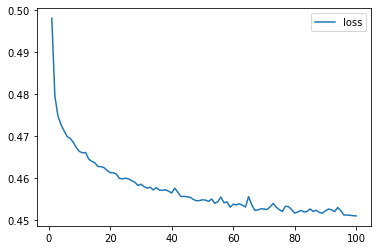

In [26]:
# Create a DataFrame containing training history
history_df_1 = pd.DataFrame(fit_model_1.history, index=range(1,len(fit_model_1.history["loss"])+1))

# Plot the loss
history_df_1.plot(y="loss")

<AxesSubplot:>

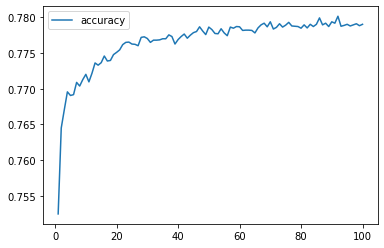

In [27]:
# Plot the accuracy
history_df_1.plot(y="accuracy")

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Relu Nueral Network:\nLoss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5215 - accuracy: 0.7648
Relu Nueral Network:
Loss: 0.5215158989026317, Accuracy: 0.7647813558578491


In [29]:
# Compile the model with nn_2
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path_2,
    verbose=1,
    save_weights_only=True,
    save_freq=25724)

# Train the model
fit_model_2 = nn_2.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25120/25724 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7468
Epoch 00001: saving model to checkpoints/weights_nn2.01.hdf5
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5026 - accuracy: 0.7469
Epoch 2/100
25408/25724 [============================>.] - ETA: 0s - loss: 0.4824 - accuracy: 0.7595
Epoch 00002: saving model to checkpoints/weights_nn2.02.hdf5
25724/25724 [==============================] - 1s 44us/sample - loss: 0.4825 - accuracy: 0.7593
Epoch 3/100
24992/25724 [============================>.] - ETA: 0s - loss: 0.4785 - accuracy: 0.7620
Epoch 00003: saving model to checkpoints/weights_nn2.03.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 0.4784 - accuracy: 0.7620
Epoch 4/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.7664
Epoch 00004: saving model to checkpoints/weights_nn2.04.hdf5
25724/25724 [============================

Epoch 33/100
25376/25724 [============================>.] - ETA: 0s - loss: 0.4560 - accuracy: 0.7778
Epoch 00033: saving model to checkpoints/weights_nn2.33.hdf5
25724/25724 [==============================] - 1s 43us/sample - loss: 0.4557 - accuracy: 0.7780
Epoch 34/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.4560 - accuracy: 0.7774
Epoch 00034: saving model to checkpoints/weights_nn2.34.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.4557 - accuracy: 0.7777
Epoch 35/100
24896/25724 [============================>.] - ETA: 0s - loss: 0.4549 - accuracy: 0.7774 ETA: 
Epoch 00035: saving model to checkpoints/weights_nn2.35.hdf5
25724/25724 [==============================] - 1s 41us/sample - loss: 0.4549 - accuracy: 0.7777
Epoch 36/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.4541 - accuracy: 0.7793
Epoch 00036: saving model to checkpoints/weights_nn2.36.hdf5
25724/25724 [==============================] - 1s 41us

Epoch 00064: saving model to checkpoints/weights_nn2.64.hdf5
25724/25724 [==============================] - 1s 48us/sample - loss: 0.4530 - accuracy: 0.7785
Epoch 65/100
25536/25724 [============================>.] - ETA: 0s - loss: 0.4522 - accuracy: 0.7788
Epoch 00065: saving model to checkpoints/weights_nn2.65.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 0.4521 - accuracy: 0.7789
Epoch 66/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.4521 - accuracy: 0.7788
Epoch 00066: saving model to checkpoints/weights_nn2.66.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.4520 - accuracy: 0.7787
Epoch 67/100
25472/25724 [============================>.] - ETA: 0s - loss: 0.4528 - accuracy: 0.7794
Epoch 00067: saving model to checkpoints/weights_nn2.67.hdf5
25724/25724 [==============================] - 1s 40us/sample - loss: 0.4531 - accuracy: 0.7793
Epoch 68/100
25600/25724 [============================>.] - ETA: 0

24864/25724 [===========================>..] - ETA: 0s - loss: 0.4510 - accuracy: 0.7781
Epoch 00096: saving model to checkpoints/weights_nn2.96.hdf5
25724/25724 [==============================] - 1s 39us/sample - loss: 0.4504 - accuracy: 0.7787
Epoch 97/100
24544/25724 [===========================>..] - ETA: 0s - loss: 0.4502 - accuracy: 0.7808
Epoch 00097: saving model to checkpoints/weights_nn2.97.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 0.4508 - accuracy: 0.7801
Epoch 98/100
24800/25724 [===========================>..] - ETA: 0s - loss: 0.4512 - accuracy: 0.7798
Epoch 00098: saving model to checkpoints/weights_nn2.98.hdf5
25724/25724 [==============================] - 1s 42us/sample - loss: 0.4511 - accuracy: 0.7794
Epoch 99/100
24320/25724 [===========================>..] - ETA: 0s - loss: 0.4507 - accuracy: 0.7794
Epoch 00099: saving model to checkpoints/weights_nn2.99.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.4

<AxesSubplot:>

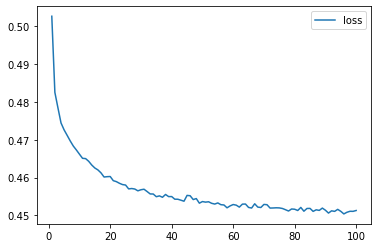

In [30]:
# Create a DataFrame containing training history
history_df_2 = pd.DataFrame(fit_model_2.history, index=range(1,len(fit_model_2.history["loss"])+1))

# Plot the loss
history_df_2.plot(y="loss")

<AxesSubplot:>

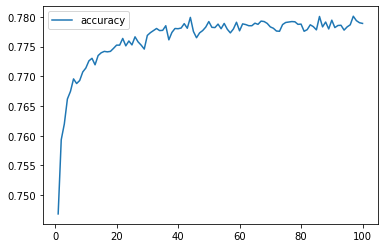

In [31]:
# Plot the accuracy
history_df_2.plot(y="accuracy")

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Tanh Nueral Network:\nLoss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.4923 - accuracy: 0.7650
Tanh Nueral Network:
Loss: 0.49231070077801586, Accuracy: 0.7650145888328552


In [33]:
# It is noticed that there is a slight overfitting in the model (as shown from the higher accuracy in the training sets 
# than the test), the number of neurons will be reduced until these numbers are close to within reason. The nn_ 1(relu)
# model will be used to test this impact 

In [34]:
# Define the model - deep neural net with relu and reduced neurons
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  number_input_features * 1.1
hidden_nodes_layer2 = hidden_nodes_layer1 / 2 

nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 124)               14136     
_________________________________________________________________
dense_7 (Dense)              (None, 62)                7750      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 63        
Total params: 21,949
Trainable params: 21,949
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model with nn_3
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path_3,
    verbose=1,
    save_weights_only=True,
    save_freq=25724)

# Train the model
fit_model_3 = nn_3.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.4961 - accuracy: 0.7550
Epoch 00001: saving model to checkpoints/weights_nn3.01.hdf5
25724/25724 [==============================] - 1s 44us/sample - loss: 0.4959 - accuracy: 0.7552
Epoch 2/100
25632/25724 [============================>.] - ETA: 0s - loss: 0.4787 - accuracy: 0.7643
Epoch 00002: saving model to checkpoints/weights_nn3.02.hdf5
25724/25724 [==============================] - 1s 38us/sample - loss: 0.4785 - accuracy: 0.7644
Epoch 3/100
25184/25724 [============================>.] - ETA: 0s - loss: 0.4750 - accuracy: 0.7678
Epoch 00003: saving model to checkpoints/weights_nn3.03.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.4747 - accuracy: 0.7680
Epoch 4/100
24128/25724 [===========================>..] - ETA: 0s - loss: 0.4731 - accuracy: 0.7687
Epoch 00004: saving model to checkpoints/weights_nn3.04.hdf5
25724/25724 [============================

Epoch 33/100
24384/25724 [===========================>..] - ETA: 0s - loss: 0.4578 - accuracy: 0.7762
Epoch 00033: saving model to checkpoints/weights_nn3.33.hdf5
25724/25724 [==============================] - 1s 34us/sample - loss: 0.4587 - accuracy: 0.7760
Epoch 34/100
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4574 - accuracy: 0.7780
Epoch 00034: saving model to checkpoints/weights_nn3.34.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.4575 - accuracy: 0.7774
Epoch 35/100
25120/25724 [============================>.] - ETA: 0s - loss: 0.4570 - accuracy: 0.7770
Epoch 00035: saving model to checkpoints/weights_nn3.35.hdf5
25724/25724 [==============================] - 1s 33us/sample - loss: 0.4576 - accuracy: 0.7764
Epoch 36/100
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4564 - accuracy: 0.7780
Epoch 00036: saving model to checkpoints/weights_nn3.36.hdf5
25724/25724 [==============================] - 1s 30us/sampl

Epoch 65/100
25696/25724 [============================>.] - ETA: 0s - loss: 0.4537 - accuracy: 0.7786
Epoch 00065: saving model to checkpoints/weights_nn3.65.hdf5
25724/25724 [==============================] - 1s 32us/sample - loss: 0.4537 - accuracy: 0.7786
Epoch 66/100
24512/25724 [===========================>..] - ETA: 0s - loss: 0.4538 - accuracy: 0.7779
Epoch 00066: saving model to checkpoints/weights_nn3.66.hdf5
25724/25724 [==============================] - 1s 36us/sample - loss: 0.4535 - accuracy: 0.7783
Epoch 67/100
25600/25724 [============================>.] - ETA: 0s - loss: 0.4540 - accuracy: 0.7786
Epoch 00067: saving model to checkpoints/weights_nn3.67.hdf5
25724/25724 [==============================] - 1s 32us/sample - loss: 0.4541 - accuracy: 0.7785
Epoch 68/100
24640/25724 [===========================>..] - ETA: 0s - loss: 0.4528 - accuracy: 0.7787
Epoch 00068: saving model to checkpoints/weights_nn3.68.hdf5
25724/25724 [==============================] - 1s 38us/sampl

Epoch 97/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.4514 - accuracy: 0.7792
Epoch 00097: saving model to checkpoints/weights_nn3.97.hdf5
25724/25724 [==============================] - 1s 37us/sample - loss: 0.4512 - accuracy: 0.7796
Epoch 98/100
24672/25724 [===========================>..] - ETA: 0s - loss: 0.4519 - accuracy: 0.7794
Epoch 00098: saving model to checkpoints/weights_nn3.98.hdf5
25724/25724 [==============================] - 1s 35us/sample - loss: 0.4515 - accuracy: 0.7792
Epoch 99/100
25536/25724 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.7791
Epoch 00099: saving model to checkpoints/weights_nn3.99.hdf5
25724/25724 [==============================] - 1s 34us/sample - loss: 0.4516 - accuracy: 0.7790
Epoch 100/100
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4515 - accuracy: 0.7783
Epoch 00100: saving model to checkpoints/weights_nn3.100.hdf5
25724/25724 [==============================] - 1s 30us/sam

<AxesSubplot:>

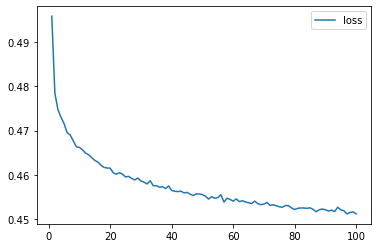

In [36]:
# Create a DataFrame containing training history
history_df_3 = pd.DataFrame(fit_model_3.history, index=range(1,len(fit_model_3.history["loss"])+1))

# Plot the loss
history_df_3.plot(y="loss")

<AxesSubplot:>

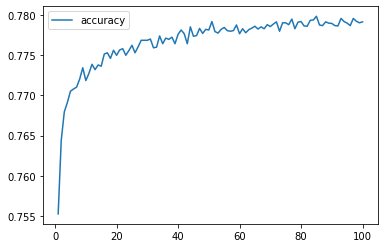

In [37]:
# Plot the accuracy
history_df_3.plot(y="accuracy")

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Relu Nueral Network with decreased neurons:\nLoss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.4969 - accuracy: 0.7634
Relu Nueral Network with decreased neurons:
Loss: 0.49687274517192787, Accuracy: 0.7633818984031677


In [39]:
# One final optimization attempt is made which involves removing the NAME column from the features dataset. This 
# might be partially contributing to the overfitting, and may result in a more overall fundamental based business 
# feasibility predictive model. THis new data will be fitted with the nn_3 model 

In [40]:
# Put all columns into List 
columns = charityData_df.columns.to_list()

# Initialize empty list 
columns_to_remove = []

# Populate list with all column titles that contian NAME_
for col in columns: 
    if "NAME_" in col:
        columns_to_remove.append(col)

charityData_df = charityData_df.drop(columns = columns_to_remove)
charityData_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# Split our processed data into our features and target arrays
y = charityData_df["IS_SUCCESSFUL"].values
X = charityData_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [42]:
# Standardize the data using StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Need to redefine the model with the new dataframe parameters
# Define the model - deep neural net with relu and reduced neurons
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  number_input_features * 1.1
hidden_nodes_layer2 = hidden_nodes_layer1 / 2 

nn_4 = tf.keras.models.Sequential()

# First hidden layer
nn_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 67)                4154      
_________________________________________________________________
dense_10 (Dense)             (None, 33)                2244      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 34        
Total params: 6,432
Trainable params: 6,432
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model with nn_3
nn_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path_4,
    verbose=1,
    save_weights_only=True,
    save_freq=25724)

# Train the model
fit_model_4 = nn_4.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
25024/25724 [============================>.] - ETA: 0s - loss: 0.5699 - accuracy: 0.7175
Epoch 00001: saving model to checkpoints/weights_nn4.01.hdf5
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5700 - accuracy: 0.7178
Epoch 2/100
25344/25724 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7300
Epoch 00002: saving model to checkpoints/weights_nn4.02.hdf5
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5536 - accuracy: 0.7304
Epoch 3/100
25376/25724 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7314
Epoch 00003: saving model to checkpoints/weights_nn4.03.hdf5
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5505 - accuracy: 0.7315
Epoch 4/100
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5472 - accuracy: 0.7343
Epoch 00004: saving model to checkpoints/weights_nn4.04.hdf5
25724/25724 [============================

Epoch 00032: saving model to checkpoints/weights_nn4.32.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5356 - accuracy: 0.7404
Epoch 33/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7408
Epoch 00033: saving model to checkpoints/weights_nn4.33.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5358 - accuracy: 0.7407
Epoch 34/100
24960/25724 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7398
Epoch 00034: saving model to checkpoints/weights_nn4.34.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5351 - accuracy: 0.7402
Epoch 35/100
25696/25724 [============================>.] - ETA: 0s - loss: 0.5356 - accuracy: 0.7400
Epoch 00035: saving model to checkpoints/weights_nn4.35.hdf5
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5356 - accuracy: 0.7400
Epoch 36/100
25664/25724 [============================>.] - ETA: 0

Epoch 64/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7431
Epoch 00064: saving model to checkpoints/weights_nn4.64.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5323 - accuracy: 0.7433
Epoch 65/100
24768/25724 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7424
Epoch 00065: saving model to checkpoints/weights_nn4.65.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5324 - accuracy: 0.7431
Epoch 66/100
25664/25724 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7426
Epoch 00066: saving model to checkpoints/weights_nn4.66.hdf5
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5321 - accuracy: 0.7425
Epoch 67/100
24256/25724 [===========================>..] - ETA: 0s - loss: 0.5317 - accuracy: 0.7427
Epoch 00067: saving model to checkpoints/weights_nn4.67.hdf5
25724/25724 [==============================] - 1s 30us/sampl

Epoch 96/100
25568/25724 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.7434
Epoch 00096: saving model to checkpoints/weights_nn4.96.hdf5
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5305 - accuracy: 0.7431
Epoch 97/100
25472/25724 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.7433
Epoch 00097: saving model to checkpoints/weights_nn4.97.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5306 - accuracy: 0.7430
Epoch 98/100
24640/25724 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7444
Epoch 00098: saving model to checkpoints/weights_nn4.98.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5304 - accuracy: 0.7434
Epoch 99/100
24512/25724 [===========================>..] - ETA: 0s - loss: 0.5304 - accuracy: 0.7430
Epoch 00099: saving model to checkpoints/weights_nn4.99.hdf5
25724/25724 [==============================] - 1s 29us/sampl

<AxesSubplot:>

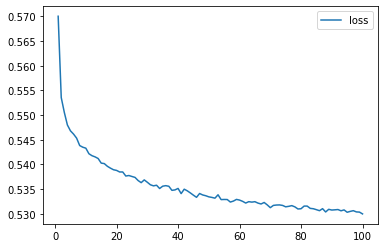

In [45]:
# Create a DataFrame containing training history
history_df_4 = pd.DataFrame(fit_model_4.history, index=range(1,len(fit_model_4.history["loss"])+1))

# Plot the loss
history_df_4.plot(y="loss")

<AxesSubplot:>

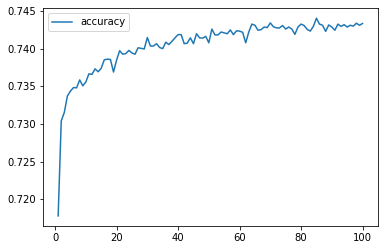

In [46]:
# Plot the accuracy
history_df_4.plot(y="accuracy")

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Relu Nueral Network with decreased neurons and modified input data:\nLoss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5520 - accuracy: 0.7270
Relu Nueral Network with decreased neurons and modified input data:
Loss: 0.5519503510033077, Accuracy: 0.7269970774650574
